<a href="https://colab.research.google.com/github/Sri-Raksha/Breast-Cancer/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dataset = pd.read_csv(url, header=None)

In [19]:
dataset.columns = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter', 'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension']

In [20]:
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M': 1, 'B': 0})

In [21]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [24]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Print the binary predictions
print(y_pred_binary)

4/4 [==============================] - 0s 7ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
46/46 [==============================] - 2s 3ms/step - loss: 2.8297 - accuracy: 0.7033
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9476 - accuracy: 0.8198
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.8857
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.8945
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.8967
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.9055
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8945
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.9011
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8989
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.9033
Epoch 11/

In [28]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9211
Accuracy: 92.11


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


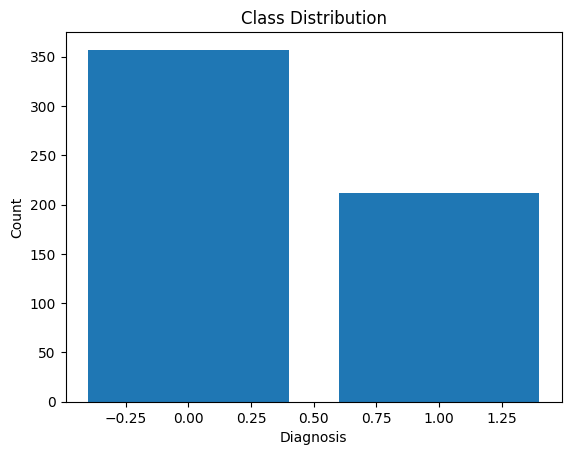

In [30]:
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed the dataset
class_distribution = dataset['Diagnosis'].value_counts()
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

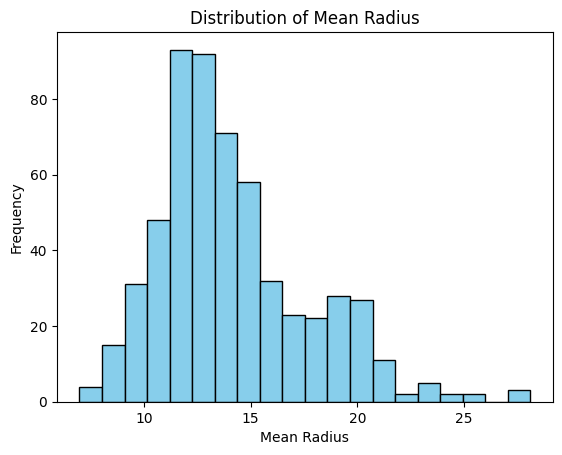

In [33]:
plt.hist(dataset['Mean Radius'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Radius')
plt.show()

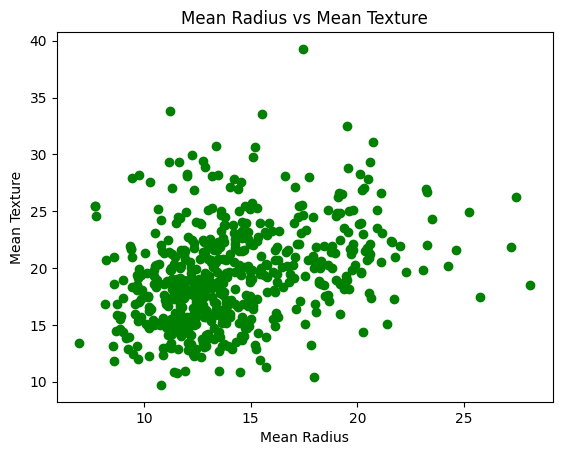

In [34]:
plt.scatter(dataset['Mean Radius'], dataset['Mean Texture'], color='green')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Mean Radius vs Mean Texture')
plt.show()